### Import Libraries

In [287]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [288]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

sns.set_style('darkgrid')

### Import Data

In [289]:
data=pd.read_csv('CO2 Emissions_Canada.csv')
df=data.copy()
print(f'Shape of data is {data.shape}')

Shape of data is (7385, 12)


In [290]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Quality Inspection of Data

1. Missing values

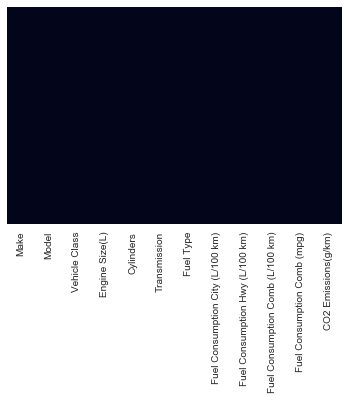

In [291]:
sns.heatmap(df.isnull(), yticklabels=0, cbar=0)

Our data has no mising values

### 1. Categorical Columns

In [292]:
cat_col=[x for x in df.columns if df[x].dtypes == 'O']
df[cat_col].head()

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z


Checking Number of categories in each categorical column

In [293]:
for i in cat_col:
    print(f'{i} has {df[i].nunique()} categories')

Make has 42 categories
Model has 2053 categories
Vehicle Class has 16 categories
Transmission has 27 categories
Fuel Type has 5 categories


Checking the Frequency of categories in each column

In [294]:
list=[]
for i in cat_col:
    for j in df[i].value_counts().head(10).index:
        list.append(i+'_'+j)

In [295]:
df_enc=pd.get_dummies(df[cat_col])[list]

### 2. Discrete Numerical Variables

In [296]:
disc_num_col=[x for x in df.columns if df[x].dtypes != 'O' and df[x].nunique()<15]
disc_num_col

['Cylinders']

In [297]:
df[disc_num_col].nunique()

Cylinders    8
dtype: int64

### 3. Continuous Numerical Variables

In [298]:
cont_num_col=[x for x in df.columns if df[x].dtypes != 'O' if x not in disc_num_col and x != 'CO2 Emissions(g/km)']
cont_num_col

['Engine Size(L)',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)']

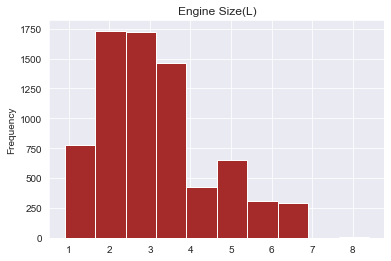

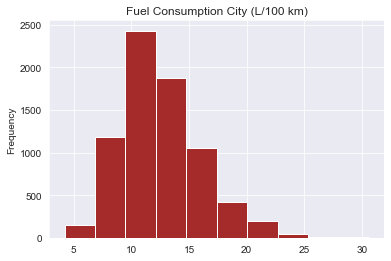

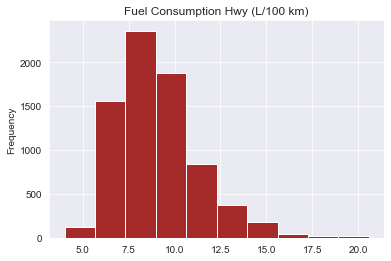

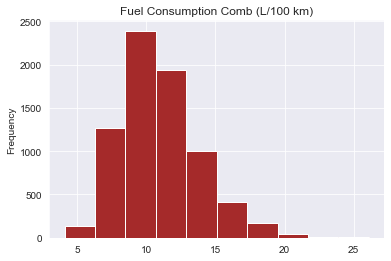

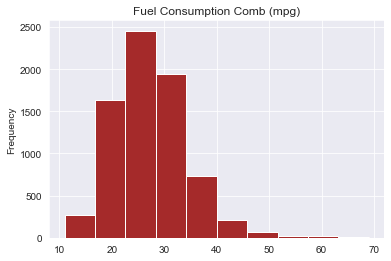

In [299]:
for i in cont_num_col:
    df[i].plot.hist(color='brown')
    plt.title(i)
    plt.show()

### Exploratory Data Analysis

Relation of continuous variables over target

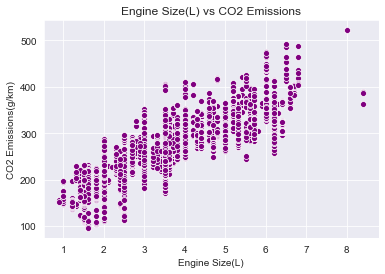

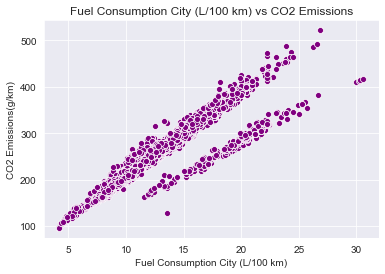

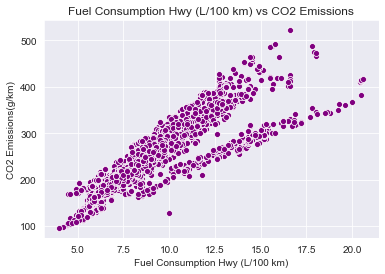

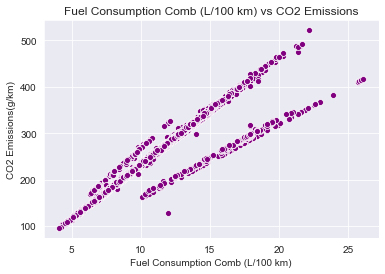

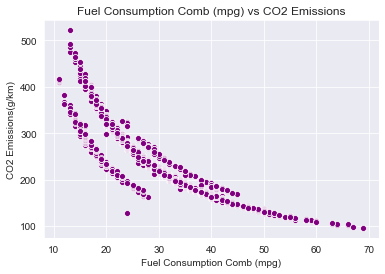

In [300]:
for i in cont_num_col:
    sns.scatterplot(x=df[i],y= df['CO2 Emissions(g/km)'], color='purple')
    plt.title(f'{i} vs CO2 Emissions')
    plt.xlabel(i)
    plt.ylabel('CO2 Emissions(g/km)')
    plt.show()

Impact of discrete numerical variables over target

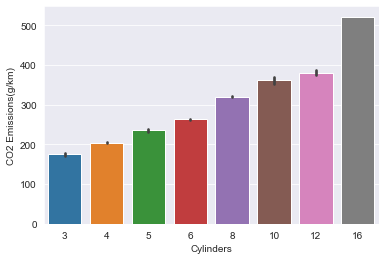

In [301]:
for i in disc_num_col:
    sns.barplot(x=df[i], y=df['CO2 Emissions(g/km)'])

From above plot it's clear that as the number of cylinders increases emission of CO2 increases

Impact of cattegorical variables over target

In [302]:
df_enc.shape

(7385, 45)

In [303]:
df_num_cont=df[cont_num_col]
df_num_cont.shape

(7385, 5)

In [304]:
df_num_disc=df[disc_num_col]
df_num_disc.shape

(7385, 1)

In [305]:
df_preprocessed=pd.concat([df_enc, df_num_disc, df_num_cont, df['CO2 Emissions(g/km)']], axis=1)

In [306]:
df_preprocessed.shape

(7385, 52)

In [307]:
X=df_preprocessed.drop('CO2 Emissions(g/km)', axis=1)
Y=df_preprocessed['CO2 Emissions(g/km)']

### Train Test Split

In [308]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test= train_test_split(X,Y, test_size=0.3, random_state=5)

In [309]:
print(f'Shape of x_train : {x_train.shape}')
print(f'Shape of x_test : {x_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of x_train : (5169, 51)
Shape of x_test : (2216, 51)
Shape of y_train : (5169,)
Shape of y_test : (2216,)


### Feature Scaling

In [310]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()

In [311]:
x_train[cont_num_col]=scaling.fit_transform(x_train[cont_num_col])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [312]:
x_test[cont_num_col]=scaling.transform(x_test[cont_num_col])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Model Creation

In [313]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [314]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Model Prediction

In [315]:
predict_train=reg.predict(x_train)
predict_test=reg.predict(x_test)

#### Model Evaluation

In [316]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### 1. Training data

In [317]:
print(f'Train Accuracy : {np.round(reg.score(x_train, y_train)*100,2)}%')

Train Accuracy : 99.33%


In [318]:
print(f'Mean Absolute error : {mean_absolute_error(y_train, predict_train)}')
print(f'Mean Squared error : {mean_squared_error(y_train, predict_train)}')
print(f'Root Mean Squared error : {np.sqrt(mean_squared_error(y_train, predict_train))}')

Mean Absolute error : 2.9673919256444576
Mean Squared error : 23.16852929678289
Root Mean Squared error : 4.813369848326938


In [319]:
print(f'R squared value : {r2_score(y_train, predict_train)}')

R squared value : 0.9933310026504011


##### Visualizing result

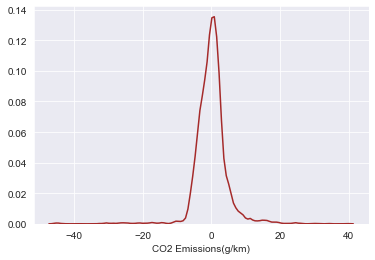

In [320]:
sns.distplot(y_train-predict_train, hist=0, color='brown')

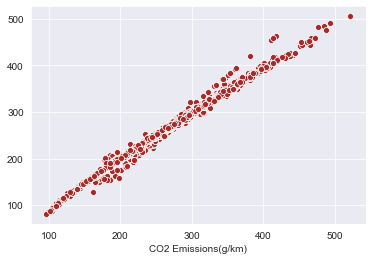

In [321]:
sns.scatterplot(y_train, predict_train, color='brown')

#### 2. Test data

In [322]:
print(f'Test Accuracy : {np.round(reg.score(x_test, y_test)*100,2)}%')

Test Accuracy : 99.35%


In [323]:
print(f'Mean Absolute error : {mean_absolute_error(y_test, predict_test)}')
print(f'Mean Squared error : {mean_squared_error(y_test, predict_test)}')
print(f'Root Mean Squared error : {np.sqrt(mean_squared_error(y_test, predict_test))}')

Mean Absolute error : 2.8621045986581426
Mean Squared error : 21.286783384689308
Root Mean Squared error : 4.613760221846093


In [324]:
print(f'R squared value : {r2_score(y_test, predict_test)}')

R squared value : 0.9935263018720569


##### Visualising result

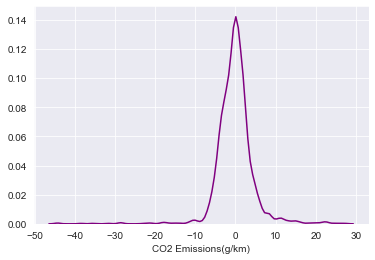

In [325]:
sns.distplot(y_test-predict_test, hist=0, color='purple')

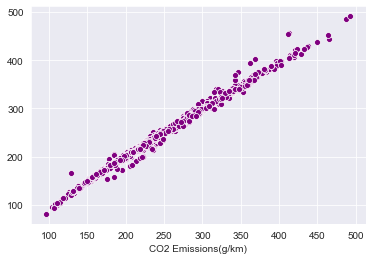

In [326]:
sns.scatterplot(y_test, predict_test, color='purple')

### Parameters of Linear Regression

In [327]:
reg.coef_        # Coefficient 

array([ 1.73939136e+00, -7.78893538e-02, -1.83063822e+00, -8.45005410e-01,
       -1.94166711e+00,  5.27017311e-01, -1.03470083e+00, -1.83878580e+00,
        2.55378289e-01,  1.19328657e+00, -3.65433987e+00, -1.84600536e+00,
       -2.16139712e+00,  1.73798507e+01,  2.47451044e-01, -6.60505432e-01,
       -1.64743624e+00, -3.48610832e+00, -1.19015746e+00, -3.51627776e+00,
       -8.11440089e-01, -7.98732097e-01, -1.36230394e+00,  8.76651221e-01,
        2.40712991e-01, -1.07012004e+00,  1.94268751e+00, -3.96887523e-01,
       -1.74457254e+00, -7.63130737e-01,  3.17505107e-03,  6.07072714e-01,
        2.77010173e-01, -5.81826862e-01,  3.23323214e-01,  2.00139956e+00,
        1.20660127e+00, -4.06767813e-01,  1.17713323e+00, -4.22367528e-01,
        3.15314689e+01,  3.19889308e+01, -7.63888121e+01,  6.16942156e+01,
       -4.88258031e+01,  1.25018713e+00, -2.66838297e-03,  2.65457451e+01,
        1.31668142e+01,  1.82121039e+01, -6.33203699e+00])

In [328]:
reg.intercept_   # intercept

218.2207558852424

We have succesfully built our Linear Regresion model and we found out Train Accuracy of about 99.33% where as test accuracy of about 99.35% From above model we can predict the amount of CO2 emitted from a vehicle.